Project Description

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Data Set Information: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Notebook guide:
   - Importing the dataset
   - Visualizing the data
   - Data preprocessing
   - Filling missing Data
   - Spliting the Data
   - Selecting Evaluation Metrics
   - Trying out Vaarious models
   - Choosing the best model
   - Finding the features that makes the model.
    

Importing neccasary libraries

In [252]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report



In [254]:
#reading the csv file
data = pd.read_csv("../input/bank-additional-full.csv", sep=";")

In [255]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

The data is imbalanced with high ratio of 'no' then 'yes'

visulizing data

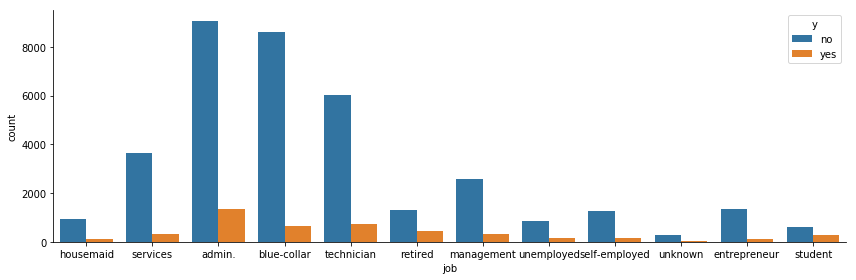

In [256]:
plt.figure(figsize=(12,4))
sns.countplot(data['job'],hue=data['y'])
plt.tight_layout()
sns.despine()

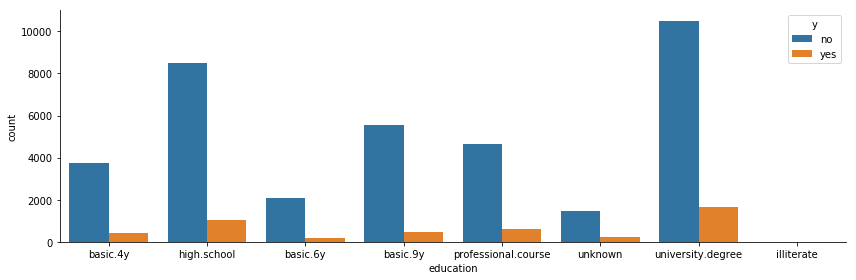

In [257]:
plt.figure(figsize=(12,4))
sns.countplot(data['education'],hue=data['y'])
plt.tight_layout()
sns.despine()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


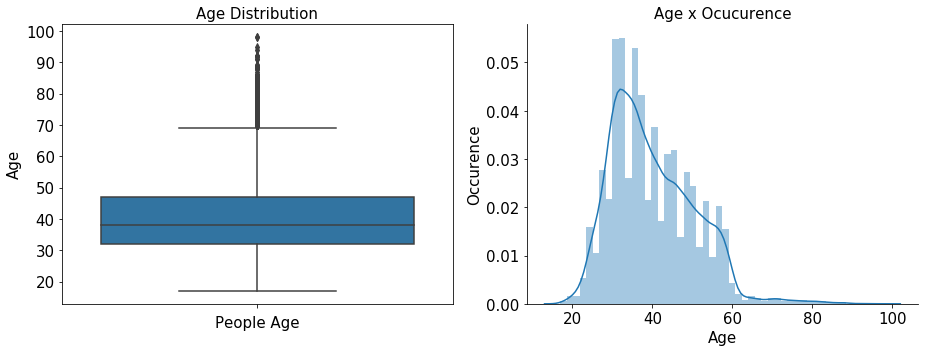

In [258]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data =data, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(data['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [259]:
data['job'].value_counts()


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [260]:
#filling missing unknown data in jobs
data.loc[(data['job']=='unknown')&(data['age']<21), 'job'] = 'student'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.4y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.6y'), 'job'] = 'blue-collar'
data.loc[(data['job']=='unknown')&(data['age']>62), 'job'] = 'retired'
data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'university.degree'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'high.school'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'basic.4y'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.9y'), 'job'] = 'blue-collar'
data.loc[(data['job']=='unknown') & (data['education']=='professional.course'), 'job'] = 'technician'


Converting Categorical variable to numerical variable

In [261]:
cat_columns = [ 'job', 'marital', 'education', 'default', 'housing', 'loan','campaign',
                     'contact', 'month', 'day_of_week', 'poutcome']
for c in cat_columns:
    data[c] = data[c].astype('category').cat.codes+1
data['y']=   data['y'].astype('category').cat.codes

In [262]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,4,2,1,1,1,1,2,7,2,261,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
1,57,8,2,4,2,1,1,2,7,2,149,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
2,37,8,2,4,1,3,1,2,7,2,226,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,2,2,1,1,1,2,7,2,151,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
4,56,8,2,4,1,1,3,2,7,2,307,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0


Visulizing the corelation in data

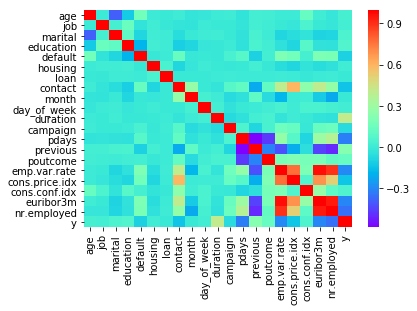

In [263]:
sns.heatmap(data.corr(),cmap='rainbow')

Features like 'nr.employed' 'euribor3m' 'emp.var.rate' 'cons.price.id' have good co-relation with y,so thier value will influnce the final outcome.

Train test Splitting

In [264]:
X = data.drop(columns = ["y"])
y = data["y"]
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=44)


ROC_AUC_score

In [265]:
def score(y_true, y_pre):
    return roc_auc_score(y_true, y_pre)

Machine Learning models

- Random Forest

In [266]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=70,min_samples_leaf=3, max_features=0.5
                              )
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [267]:
predictions = model.predict(X_train)
predictions_val = model.predict(X_val)

score(y_train, predictions), (score(y_val, predictions_val)), (sum(predictions==y_train)/len(y_train)), sum(predictions_val==y_val)/len(y_val)

(0.922500890544902, 0.7626764072013735, 0.9794527994201848, 0.9171632457882734)

In [268]:
predictions = model.predict(X_train)
predictions_val = model.predict(X_val)
print("Training")
print(classification_report(y_train, predictions))
print("Validation")
print(classification_report(y_val, predictions_val))
print("ROC-AUC")
print(score(y_train, predictions)), print(score(y_val, predictions_val))

Training
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     24553
           1       0.96      0.85      0.90      3042

   micro avg       0.98      0.98      0.98     27595
   macro avg       0.97      0.92      0.94     27595
weighted avg       0.98      0.98      0.98     27595

Validation
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11995
           1       0.68      0.56      0.61      1598

   micro avg       0.92      0.92      0.92     13593
   macro avg       0.81      0.76      0.78     13593
weighted avg       0.91      0.92      0.91     13593

ROC-AUC
0.922500890544902
0.7626764072013735


(None, None)

Plot the feature importances of the forest

In [269]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, predictions))
print(confusion_matrix(y_val, predictions_val))

[[24444   109]
 [  458  2584]]
[[11571   424]
 [  702   896]]


In [270]:

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist(),top=300)

Weight,Feature
0.1077 ± 0.0024,duration
0.0345 ± 0.0009,nr.employed
0.0323 ± 0.0011,euribor3m
0.0224 ± 0.0010,age
0.0151 ± 0.0010,month
0.0129 ± 0.0003,day_of_week
0.0122 ± 0.0009,job
0.0115 ± 0.0006,cons.conf.idx
0.0107 ± 0.0010,education
0.0093 ± 0.0007,cons.price.idx


In [271]:
np.sort(model.feature_importances_), data.columns

(array([0.00533067, 0.00664458, 0.00723503, 0.00783692, 0.01178961,
        0.01464829, 0.01499068, 0.01854534, 0.01894074, 0.02471635,
        0.02597409, 0.0263105 , 0.02924954, 0.03124502, 0.03351479,
        0.03729406, 0.07738598, 0.12222004, 0.12469986, 0.36142792]),
 Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
        'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
       dtype='object'))

- KNearestNeighbors

In [272]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
pred=knn.predict(X_train)
knnpred = knn.predict(X_val)

In [273]:
score(y_train, pred), (score(y_val, knnpred)), (sum(pred==y_train)/len(y_train)), sum(knnpred==y_val)/len(y_val)

(0.7183296647140952,
 0.7129251549847898,
 0.9179923899257112,
 0.9083351725152652)

- LogisticRegression

In [274]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
pred=logmodel.predict(X_train)
logpred = logmodel.predict(X_val)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [275]:
score(y_train, pred), (score(y_val, logpred)), (sum(pred==y_train)/len(y_train)), sum(logpred==y_val)/len(y_val)

(0.6841576366364187,
 0.6906239093155733,
 0.9112520384127559,
 0.9077466342970647)

- XGBoost

In [276]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbtrain=xgb.predict(X_train)
xgbprd = xgb.predict(X_val)

In [277]:
score(y_train, xgbtrain), (score(y_val, xgbprd)), (sum(xgbtrain==y_train)/len(y_train)), sum(xgbprd==y_val)/len(y_val)

(0.7335225562177307,
 0.7340139117206221,
 0.9196593585794528,
 0.9134848819245199)

Random Forest turns out to be the best model with high ROC_AUC_score